In [36]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Smoking and Birthweights: Review ##

In [37]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [38]:
smoking_and_birthweight = births.select('Birth Weight', 'Maternal Smoker')
smoking_and_birthweight

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


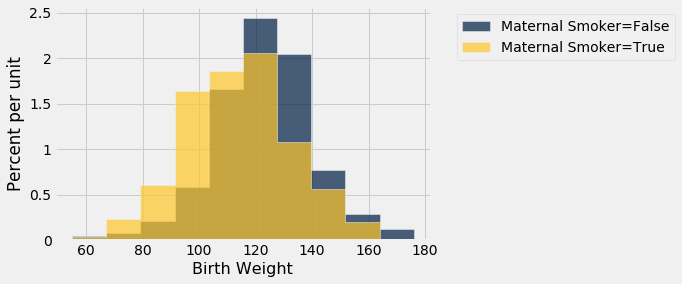

In [39]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [40]:
def difference_of_means(table, numerical_variable, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(numerical_variable, group_label) 
    
    # table containing group means
    grouped = reduced.group(group_label, np.average)

    # array of group means
    avg_label = numerical_variable + ' average'
    means = grouped.column(avg_label)
    
    return means.item(1) - means.item(0)

In [41]:
#observed test stat
observed = difference_of_means(births, 'Birth Weight', 'Maternal Smoker')
observed

-9.266142572024918

In [43]:
def one_simulated_difference(table, numerical_variable, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.with_columns('Shuffled Label', shuffled_labels)
    
    #return one value of the test stat

    return difference_of_means(shuffled_table, numerical_variable, 'Shuffled Label')

one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

1.8591069061657208

In [44]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference:  -9.266142572024918


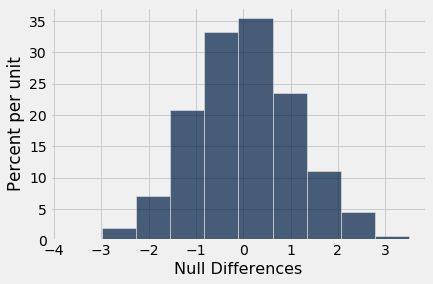

In [46]:
Table().with_column('Null Differences', differences).hist()
print("Observed Difference: ", observed)

In [51]:
np.count_nonzero(differences <= observed)/len(differences)

0.0

## Botox and Back Pain ##

In [60]:
botox = Table.read_table('bta.csv')
botox

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [54]:
botox.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [57]:
botox.sample(botox.num_rows, with_replacement = False).group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [55]:
#test statistic
def distance(table, variable, group_label):
    reduced = table.select(variable, group_label)
    avg_label = variable + " average"
    proportions = reduced.group(group_label, np.average).column(avg_label)
    return abs(proportions.item(0) - proportions.item(1))

In [56]:
observed_botox = distance(botox, 'Result', 'Group')
observed_botox

0.475

In [61]:
#one value of the test statistic under the null hypothesis
shuffled_labels = botox.sample(botox.num_rows, with_replacement = False).column('Group')
botox_with_shuffled = botox.with_columns('Shuffled Labels', shuffled_labels)
botox_with_shuffled

Group,Result,Shuffled Labels
Control,1,Control
Control,1,Treatment
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Treatment
Control,0,Treatment
Control,0,Control
Control,0,Treatment
Control,0,Treatment


In [62]:
distance(botox_with_shuffled, 'Result', 'Shuffled Labels')

0.08750000000000002

In [63]:
def one_simulated_distance(table, variable, group_label):
    """Takes: name of table, column label of variable,
    column label of group-label variable
    Returns: Distance between means (or proportion of 1s) of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.with_columns('Shuffled Labels', shuffled_labels)
    
    #return one value of the test stat

    return distance(shuffled_table, variable, 'Shuffled Labels')

In [69]:
#simulate many times
distances = make_array()

for i in np.arange(5000):
    new_distance = one_simulated_distance(botox, 'Result', 'Group')
    distances = np.append(distances, new_distance)

distances

array([0.21666667, 0.04166667, 0.17083333, ..., 0.17083333, 0.0875    ,
       0.3       ])

Observed Value of the test statistic:  0.475


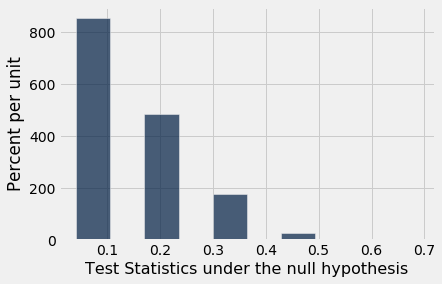

In [71]:
Table().with_columns('Test Statistics under the null hypothesis', distances).hist()
print('Observed Value of the test statistic: ', observed_botox)

In [72]:
np.count_nonzero(distances>=observed_botox)/len(distances)

0.009